In [1]:
import matplotlib.pyplot as plt
import numpy as np

from iblutil.numerical import ismember
from iblatlas.atlas import AllenAtlas
from iblatlas.genomics import merfish

df_cells, df_classes, df_subclasses, df_supertypes, df_clusters, df_genes, df_neurotransmitters = merfish.load()

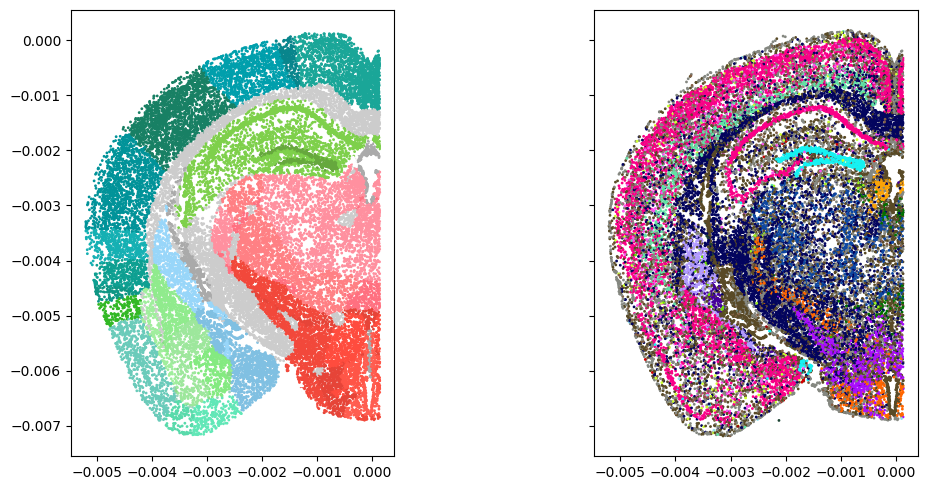

In [2]:
ba = AllenAtlas()
_, rids = ismember(df_cells['Allen_id'], ba.regions.id)
xyz = df_cells.loc[:, ['x', 'y', 'z']].values

def plot_section(section, ix, iy):
    i = df_cells['brain_section_label'] == section  # 085
    rgb_classes = merfish.int2rgb(df_classes.loc[df_cells.loc[i, 'class'], 'class_rgba'])
    fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 5))
    axs[0].scatter(xyz[i, ix], xyz[i, iy], c=ba.regions.rgba[rids[i], :].astype(np.double) / 255, s=1)
    axs[1].scatter(xyz[i, ix], xyz[i, iy], c=rgb_classes, s=1)
    axs[0].set_aspect('equal', 'box')
    axs[1].set_aspect('equal', 'box')
    fig.tight_layout()
    return fig, axs

fig, axs = plot_section(section="Zhuang-ABCA-1.085", ix=0, iy=2)